In [13]:
# Si necesitan instalar algunos paquetes
#!pip install scipy
#!pip install pandas
#!pip install seaborn
#!pip install scikit-learn

In [14]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Ejercicio 1.** Utilizando los datos de pingüinos, 
1. Construir la matrix de datos $X$ con las variables "bill_length_mm" y "bill_depth_mm".
2. Construir la matriz $X^\star$ de datos normalizados (media 0).
3. Construir la matriz de covarianza $\Sigma$.
4. Comparar con el resultado de `np.cov(X.transpose(), bias = 1))`

In [15]:
# Eliminamos datos faltantes y reseteamos los índices, para no tener problemas al graficar
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)

# Normalizamos las variables "bill_length_mm" y "bill_depth_mm" por MinMax
penguins[["bill_length_mm", "bill_depth_mm"]] = MinMaxScaler().fit_transform(penguins[["bill_length_mm", "bill_depth_mm"]])

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,181.0,3750.0,Male
1,Adelie,Torgersen,0.269091,0.511905,186.0,3800.0,Female
2,Adelie,Torgersen,0.298182,0.583333,195.0,3250.0,Female
3,Adelie,Torgersen,0.167273,0.738095,193.0,3450.0,Female
4,Adelie,Torgersen,0.261818,0.892857,190.0,3650.0,Male


In [16]:
# Item 1
# Nos quedamos con las variables de longitud y profundidad del pico
X = penguins[["bill_length_mm", "bill_depth_mm"]]
X.head()

,bill_length_mm,bill_depth_mm
0,0.254545,0.666667
1,0.269091,0.511905
2,0.298182,0.583333
3,0.167273,0.738095
4,0.261818,0.892857


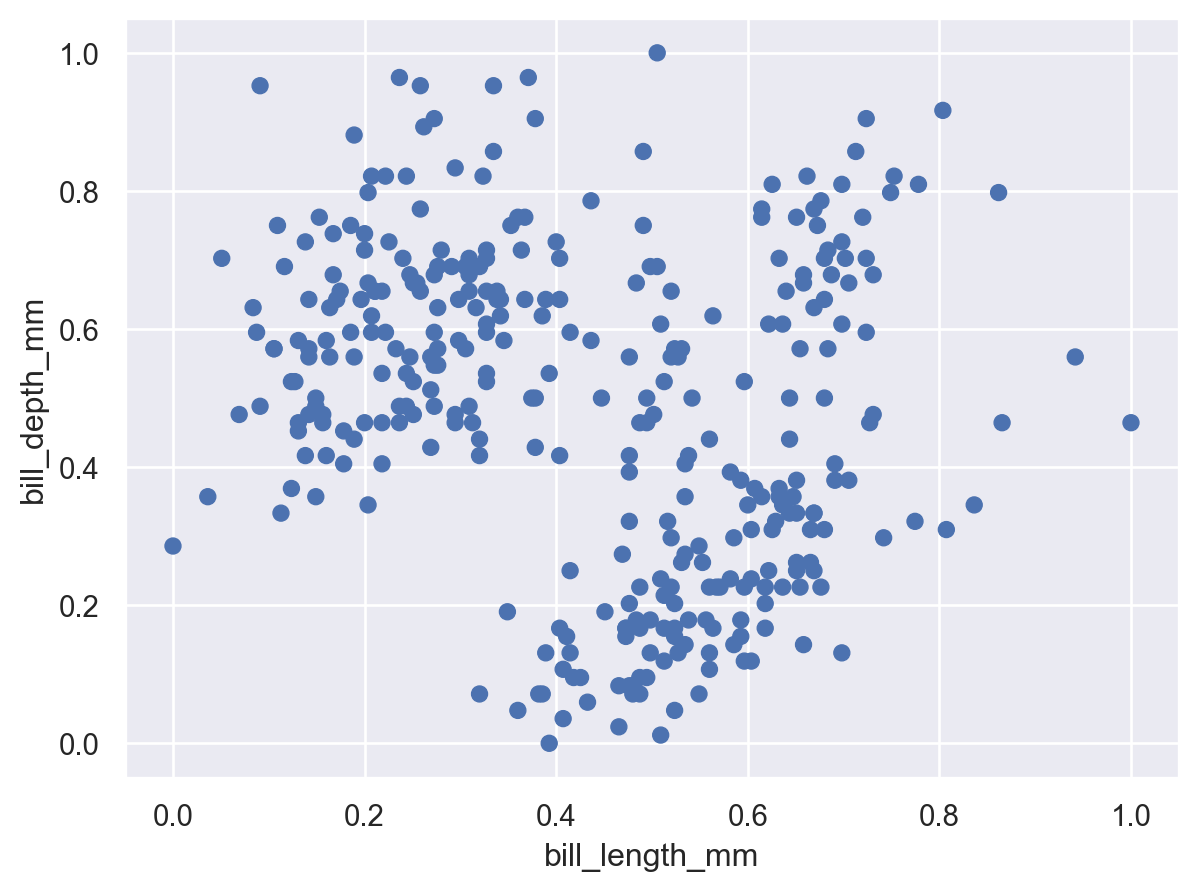

In [17]:
# Graficamos
(
    so.Plot(data = X, x = "bill_length_mm", y = "bill_depth_mm")
    .add(so.Dot())
)

In [18]:
# Media de cada columna 
length = X["bill_length_mm"].mean()
depth = X["bill_depth_mm"].mean()


In [19]:


X_raya = pd.DataFrame(data, columns = columnas)

X_raya

NameError: name 'data' is not defined

In [ ]:
X_star = ???
X_star.head()

In [ ]:
n = len(X_star)
Sigma = ???
Sigma

In [ ]:
# Comparamos con el comando np.cov de Numpy
# Ttenemos que pasarle las variables como columnas.
# Si no usamos bias = 1, divide por n-1 en lugar de n.
np.cov(X.transpose(), bias = 1)

**Ejercicio 2**
1. Calcular las componentes principales de la matriz X del ejercicio anterior.
2. Graficar los datos normalizados y las componentes principales.
3. Realizar un nuevo gráfico con los datos transformados.

In [ ]:
# eigh es un comando especial para calcular autovalores y autovectores de matrices simétricas
# Devuelve una dupla:
# - la primer componente es el vector de autovalores, ordenados de menor a mayor
# - la segunda componente es la matriz de autovectores. la i-ésima columna de U es el autovector correspondiente al i-ésimo autovalor
gamma, U = np.linalg.eigh(Sigma) 
print(gamma)
print(U)

In [ ]:
# Los autovalores que nos devuelve eigh están siempre ordenados de menor a mayor.
# Damos vueltas los autovalores y las columnas de la matriz de autovectores usando np.flip(-,1)
gamma = np.flip(gamma)
print(gamma)

U = np.flip(U, 1)   # U tiene los autovectores de Sigma como columnas
print(U)

In [ ]:
# Graficamos los autovectores
(
    so.Plot()
    .add(so.Dot(), x = X_star["bill_length_mm"], y = X_star["bill_depth_mm"])
    .add(so.Line(color = "green"), x = [0, U[0,0]], y = [0, U[1,0]]) # Primera dirección principal
    .add(so.Line(color = "red"), x = [0, U[0,1]], y = [0, U[1,1]]) # Segunda dirección principal
    .layout(size = (6,6))
)

In [ ]:
Z = ???
Z.columns = ["Z1", "Z2"]  # Renombramos las columnas
Z

In [ ]:
# Graficamos las nuevas variables.
(
    so.Plot(data = Z, x = "Z1", y = "Z2")
    .add(so.Dot())
)

**Ejercicio:** Para la matriz de covarianza
$$
M = \left(
   \begin{array}{cccc}
    3 & 1/2 & 1/3 & 0\\
    1/2 & 4 & 1/6 & 3/4\\
    1/3 & 1/6 & 2 & 0 \\
    0 & 3/4 & 0 & 5
   \end{array}
   \right)
$$
calcular la varianza explicada acumulada de las dos primeras componentes principales.

### Aplicación

En el archivo `paises.csv` se encuentran 11 variables ecónomicas y sociales asociadas a 21 países. Queremos usar esas variables para visualizar países con comportamientos similares.

In [22]:
Dir = "/Users/Usuario/Documents/EXACTAS/DATOS/2do Año/Labo de Datos/LDD/P8 LDD/"

In [23]:
# Leemos los datos
datos = pd.read_csv(Dir + 'paises.csv', index_col = "Pais")   # dataFrame
X = datos
X.columns = X.columns.str.strip()  # Los nombres tienen un espacio al principio, lo eliminamos
display(X)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Pais,,,,,,,,,,,
Albania,1.0,30,41,2199,3903,12,94,53,0.0,341,1.2
Angola,3.0,124,46,4422,955,6,57,19,0.7,89,0.5
Arabia Saudi,4.3,21,13,133540,91019,96,497,1,0.0,4566,13.1
Argelia,2.5,34,24,44609,19883,42,180,2,0.8,906,3.0
Argentina,1.3,22,31,278431,65962,160,1043,22,0.1,1504,3.5
Australia,1.4,6,43,337909,167155,510,933,19,0.0,5341,15.3
Austria,0.6,6,41,216547,53259,465,304,47,-0.4,3301,7.2
Bangladesh,2.0,79,42,28599,9891,2,220,6,4.1,64,0.2
Belgica,0.3,8,40,250710,72236,457,917,20,-0.3,5120,10.1


In [24]:
X.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'], dtype='object')

Los variables corresponden a los siguientes indicadores:

1. X1 = Tasa anual de crecimiento de la población
2. X2 = Tasa de mortalidad infantil por cada 1000 nacidos vivos, 
3. X3 = Porcentaje de mujeres en la población activa, 
4. X4 = PNB en 1995 (en millones de dólares), 
5. X5 = Producción de electricidad (en millones kW/h), 
6. X6 = Líneas telefónicas por cada 1000 habitantes, 
7. X7 = Consumo de agua per cápita, 
8. X8 = Proporción de la superficie del país cubierta por bosques, 
9. X9 = Proporción de deforestación anual, 
10. X10 = Consumo de energía per cápita, 
11. X11 = Emisión de CO2 per cápita.



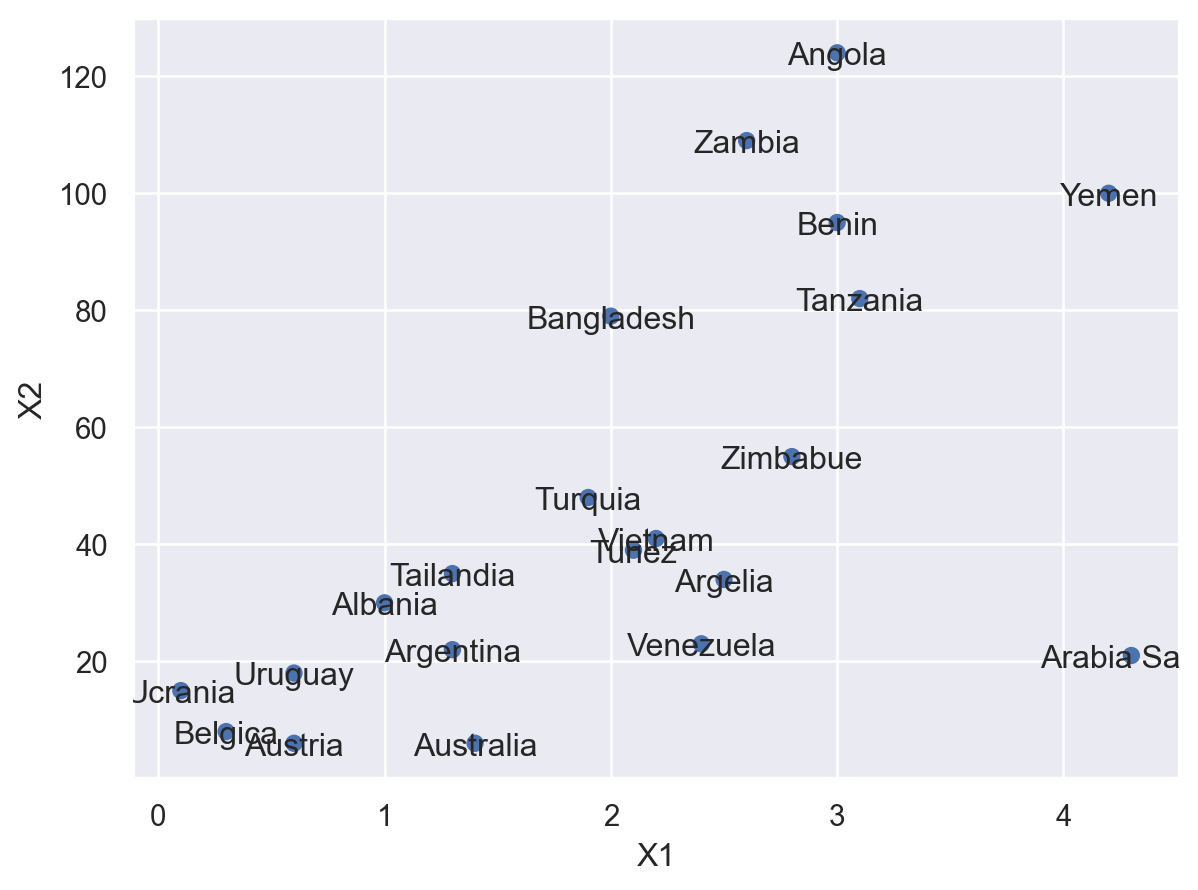

In [25]:
# Graficamos algunos pares de variables
(
    so.Plot(data = X, x = "X1", y = "X2", text = X.index)
    .add(so.Dot())
    .add(so.Text())
)

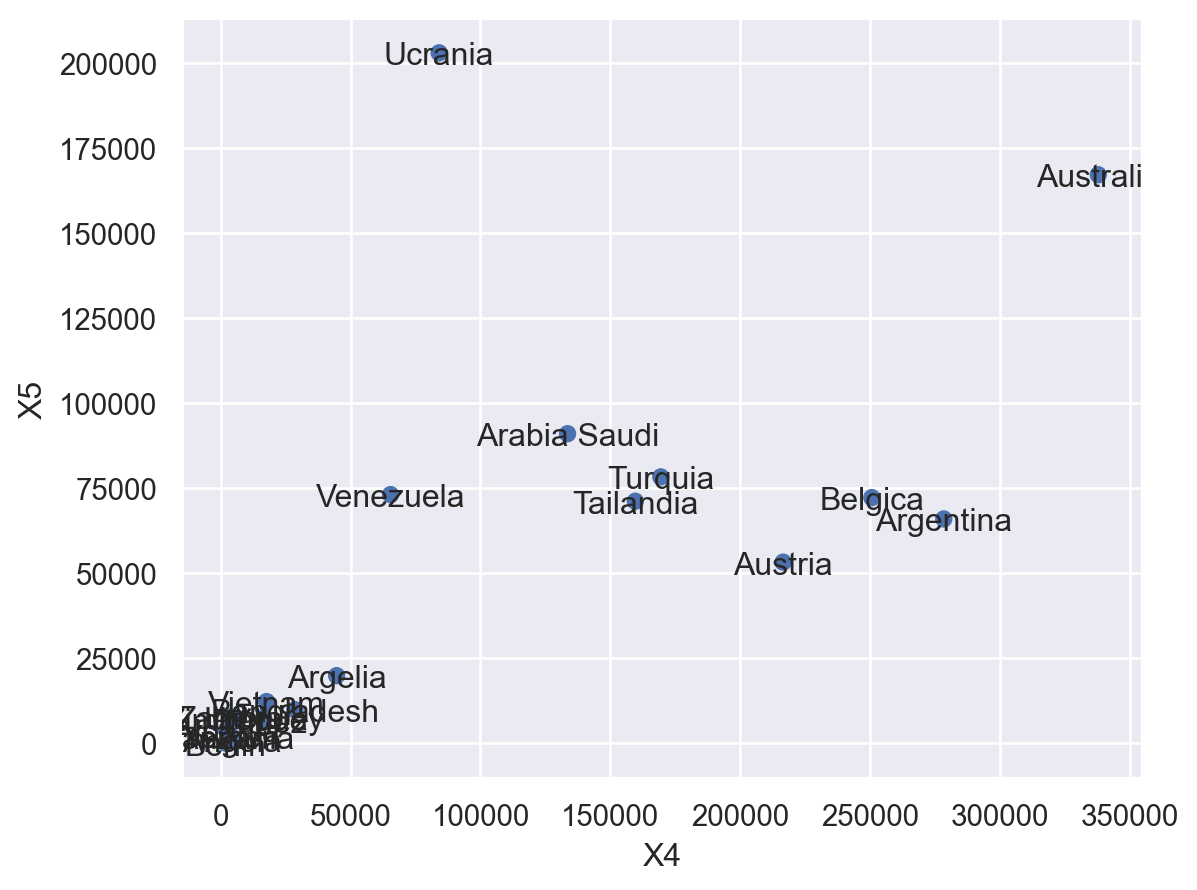

In [26]:
# Graficamos la información de dos variables 

# X4 = PNB en 1995 (en millones de dólares),
# X5 = Producción de electricidad (en millones kW/h),
(
    so.Plot(data = X, x = "X4", y = "X5", text = X.index)
    .add(so.Dot())
    .add(so.Text())
)

In [ ]:
# En estos ejemplos los países aparecen muy juntos, queremos ver si encontramos nuevas variables que nos permitan separar mejor a los países.

In [28]:
# Como tenemos datos en distintas escalas llevamos los datos a media 0 y varianza 1.
# Esta normalización se obtiene restando la media y dividiendo por el desvío estandar.
X_star = StandardScaler().set_output(transform="pandas").fit_transform(X)
display(X_star)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Pais,,,,,,,,,,,
Albania,-0.902226,-0.482339,0.222849,-0.825028,-0.754949,-0.703428,-1.009178,1.776586,-0.466125,-0.642429,-0.591345
Angola,0.844018,2.162486,0.767014,-0.803620,-0.808442,-0.741241,-1.134199,-0.289346,0.073405,-0.788122,-0.743052
Arabia Saudi,1.979077,-0.735567,-2.824479,0.439794,0.825820,-0.174057,0.352536,-1.383075,-0.466125,1.800234,1.987664
Argelia,0.407457,-0.369793,-1.627314,-0.416617,-0.464983,-0.514367,-0.718589,-1.322312,0.150481,-0.315777,-0.201243
Argentina,-0.640290,-0.707430,-0.865482,1.835103,0.371147,0.229274,2.197440,-0.107058,-0.389049,0.029953,-0.092881
Australia,-0.552978,-1.157613,0.440515,2.407879,2.207351,2.434991,1.825756,-0.289346,-0.466125,2.248296,2.464455
Austria,-1.251475,-1.157613,0.222849,1.239156,0.140644,2.151399,-0.299600,1.412010,-0.774428,1.068880,0.708995
Bangladesh,-0.029104,0.896346,0.331682,-0.570794,-0.646293,-0.766449,-0.583431,-1.079261,2.693982,-0.802576,-0.808069
Belgica,-1.513412,-1.101340,0.114016,1.568148,0.484992,2.100982,1.771693,-0.228584,-0.697352,2.120526,1.337493


In [29]:
# Calculamos la matriz de covarianza:
# cov = (X - Xraya)^T * (X - Xraya) / N = (B^T * B) / N
X_star_t = np.transpose(X_star)
N = len(X_star)
Sigma = (X_star_t @ X_star) / N
display(Sigma)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
X1,1.000000,0.629606,-0.380853,-0.446483,-0.425196,-0.583977,-0.442263,-0.139033,0.162366,-0.325678,-0.278883
X2,0.629606,1.000000,0.258119,-0.626758,-0.597896,-0.656055,-0.615723,0.083098,0.350169,-0.684482,-0.663817
X3,-0.380853,0.258119,1.000000,-0.155930,-0.030875,-0.014938,-0.187816,0.460945,0.333558,-0.270369,-0.263690
X4,-0.446483,-0.626758,-0.155930,1.000000,0.672974,0.835755,0.860429,-0.034205,-0.170113,0.773268,0.700910
X5,-0.425196,-0.597896,-0.030875,0.672974,1.000000,0.588598,0.727782,-0.098846,-0.175931,0.767040,0.857659
X6,-0.583977,-0.656055,-0.014938,0.835755,0.588598,1.000000,0.638939,0.020698,-0.398086,0.817128,0.721509
X7,-0.442263,-0.615723,-0.187816,0.860429,0.727782,0.638939,1.000000,-0.232275,-0.210303,0.682377,0.648466
X8,-0.139033,0.083098,0.460945,-0.034205,-0.098846,0.020698,-0.232275,1.000000,0.126503,-0.116264,-0.170226
X9,0.162366,0.350169,0.333558,-0.170113,-0.175931,-0.398086,-0.210303,0.126503,1.000000,-0.351347,-0.344128
X10,-0.325678,-0.684482,-0.270369,0.773268,0.767040,0.817128,0.682377,-0.116264,-0.351347,1.000000,0.967906


In [30]:
# Comparamos con el comando cov de numpy
display(np.cov(np.transpose(X_star), bias = 1))

# Tenemos que transponer X porque cov requiere variables en filas
# El parámetro bias = 1 hace que divida por N. Si no lo ponemos, o ponemos bias = 0, divide por N-1.

array([[ 1.        ,  0.62960563, -0.38085272, -0.44648335, -0.42519569,
        -0.58397672, -0.44226306, -0.13903328,  0.16236635, -0.3256778 ,
        -0.27888323],
       [ 0.62960563,  1.        ,  0.25811855, -0.6267577 , -0.59789643,
        -0.65605528, -0.6157233 ,  0.0830981 ,  0.35016856, -0.68448239,
        -0.66381678],
       [-0.38085272,  0.25811855,  1.        , -0.15593001, -0.03087508,
        -0.01493831, -0.18781641,  0.46094529,  0.33355766, -0.27036942,
        -0.26368959],
       [-0.44648335, -0.6267577 , -0.15593001,  1.        ,  0.6729744 ,
         0.83575465,  0.86042885, -0.03420469, -0.17011318,  0.77326805,
         0.70090974],
       [-0.42519569, -0.59789643, -0.03087508,  0.6729744 ,  1.        ,
         0.58859806,  0.72778184, -0.09884628, -0.17593148,  0.76703996,
         0.85765874],
       [-0.58397672, -0.65605528, -0.01493831,  0.83575465,  0.58859806,
         1.        ,  0.63893862,  0.02069816, -0.39808578,  0.81712791,
         0.721

Obtuvimos la misma matriz!

Ahora podemos calcular las componentes principales.
Calculamos primero los autovalores y autovectores de la matriz de covarianza y los ordenamos los autovectores por autovalor.

In [31]:
gamma, U = np.linalg.eigh(Sigma)  # Usamos eigh porque A es simétrica. Podemos usar eig también
display(gamma)
display(U)

array([2.88774979e-03, 3.25582148e-02, 7.81459028e-02, 1.06712764e-01,
       3.55335107e-01, 4.81437963e-01, 5.55648302e-01, 7.88538421e-01,
       9.87267285e-01, 1.80967483e+00, 5.80179346e+00])

array([[ 5.00990711e-02,  1.58410366e-01, -3.75722359e-01,
         4.59557273e-01, -4.17835886e-02, -1.61304573e-01,
         1.10114143e-02,  5.25712075e-01, -2.41768349e-01,
        -4.52161932e-01, -2.29944001e-01],
       [-5.10064788e-02, -3.51761007e-02,  3.34109620e-01,
        -4.89773662e-01, -5.58942175e-02, -6.14321278e-01,
        -2.27542828e-01,  2.30561638e-01, -2.08611582e-01,
        -2.24073149e-02, -3.39386829e-01],
       [ 4.79569764e-02, -1.19634971e-01, -1.31315145e-01,
         4.88161730e-01,  5.18702043e-02, -2.67124067e-01,
        -4.59869710e-01, -7.56881984e-02, -8.35168266e-02,
         6.49484044e-01, -8.82203928e-02],
       [ 9.17897113e-02, -6.32703336e-01, -3.24743511e-01,
        -9.53786067e-02, -4.51353153e-04, -3.49845512e-01,
         4.21670826e-01,  4.79786170e-02, -1.90078782e-01,
         6.81883990e-02,  3.65274952e-01],
       [ 2.46236551e-01,  1.88884109e-01, -3.81797594e-01,
        -3.81892563e-01, -4.22832116e-01,  1.98174051e-01,
  

In [37]:
# Los autovalores están ordenados de menor a mayor.
# Damos vueltas las columnas de la matriz de autovectores usando np.flip(-,1)
gamma = np.flip(gamma)
U = np.flip(U, 1)   # U tiene los autovectores de Sigma como columnas
print (gamma)
print(U)

[5.80179346e+00 1.80967483e+00 9.87267285e-01 7.88538421e-01
 5.55648302e-01 4.81437963e-01 3.55335107e-01 1.06712764e-01
 7.81459028e-02 3.25582148e-02 2.88774979e-03]
[[-2.29944001e-01 -4.52161932e-01 -2.41768349e-01  5.25712075e-01
   1.10114143e-02 -1.61304573e-01 -4.17835886e-02  4.59557273e-01
  -3.75722359e-01  1.58410366e-01  5.00990711e-02]
 [-3.39386829e-01 -2.24073149e-02 -2.08611582e-01  2.30561638e-01
  -2.27542828e-01 -6.14321278e-01 -5.58942175e-02 -4.89773662e-01
   3.34109620e-01 -3.51761007e-02 -5.10064788e-02]
 [-8.82203928e-02  6.49484044e-01 -8.35168266e-02 -7.56881984e-02
  -4.59869710e-01 -2.67124067e-01  5.18702043e-02  4.88161730e-01
  -1.31315145e-01 -1.19634971e-01  4.79569764e-02]
 [ 3.65274952e-01  6.81883990e-02 -1.90078782e-01  4.79786170e-02
   4.21670826e-01 -3.49845512e-01 -4.51353153e-04 -9.53786067e-02
  -3.24743511e-01 -6.32703336e-01  9.17897113e-02]
 [ 3.46900282e-01  5.89703905e-02 -2.75037632e-01  9.27843128e-02
  -4.31215872e-01  1.98174051e-01

In [33]:
# U son las direcciones del nuevo espacio
# Calculamos las componentes principales usando la formula
# Z = (X - Xraya) * U

Z = X_star @ U 
Z.columns = ["Z" + str(i) for i in range(1,12)]  # Renombramos las columnas
display(Z)

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11
Pais,,,,,,,,,,,
Albania,-1.314498,1.309112,1.656815,0.276028,0.440657,1.126621,-0.343799,-0.110856,0.267103,-0.250501,-0.072006
Angola,-2.808541,-0.101074,-0.185414,0.319219,-0.891104,-1.148604,0.228074,-0.308467,0.121829,-0.252857,0.030310
Arabia Saudi,2.142693,-3.865327,-0.762620,1.324160,-0.106606,0.879214,0.240773,0.159893,0.127616,-0.189180,0.020169
Argelia,-0.717596,-1.947052,0.042520,-0.716696,0.339690,0.792807,0.542909,-0.355942,-0.195000,-0.089935,0.010125
Argentina,2.161233,-0.260380,-0.292491,-0.839664,1.587065,-0.667285,-1.282206,0.006468,0.071271,-0.272499,-0.041298
Australia,5.521872,0.442334,-0.854318,0.732831,-0.548201,-0.792468,0.352200,0.193013,-0.376689,-0.038980,-0.123493
Austria,2.555125,1.517681,1.476238,0.840427,0.669239,-0.031991,1.054482,-0.308736,-0.305054,-0.030553,0.020338
Bangladesh,-2.232710,0.278718,-2.144314,-1.165945,0.155295,0.304232,0.994898,-0.356474,0.207898,0.072934,-0.052687
Belgica,4.273571,0.572201,0.309189,-0.263386,0.280263,-0.752785,0.681625,0.267013,0.794839,0.104901,0.089732


In [ ]:
# Graficamos
(
    so.Plot(data = Z, x = "Z1", y = "Z2", text = X.index)
    .add(so.Dot())
    .add(so.Text())
    .layout(size=(12,8))    
)

In [34]:
# Repetimos todo lo mismo usando los comandos de Python

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_star)
print(principalComponents)

[[-1.31449773 -1.30911242]
 [-2.80854116  0.10107432]
 [ 2.14269325  3.86532706]
 [-0.71759606  1.94705228]
 [ 2.16123329  0.26038045]
 [ 5.52187172 -0.44233417]
 [ 2.55512467 -1.51768068]
 [-2.23271035 -0.27871845]
 [ 4.27357138 -0.57220135]
 [-2.8227079  -0.99822891]
 [ 0.02696764 -1.45188755]
 [-2.65714166 -0.7989188 ]
 [-0.49508675  1.78661048]
 [ 0.82270995  0.05498649]
 [ 3.13905426 -0.98760323]
 [-0.0926372   0.1019809 ]
 [ 0.39475798 -0.37315616]
 [-1.4748402  -0.85315275]
 [-2.13742482  2.25866815]
 [-2.5194718  -0.82598655]
 [-1.7653285   0.03290091]]


In [ ]:
# Graficamos
(
    so.Plot(x = principalComponents[:,0], y = principalComponents[:,1], text = X.index)
    .add(so.Dot())
    .add(so.Text())
    .layout(size=(12,8))
)

In [35]:
# Veamos que variables aparecen más fuertemente en cada componente
pca.components_    # Esto nos da las direcciones (los coeficientes de la combinación lineal z = v_1 x_1 + ... v_p x_p)

array([[-0.229944  , -0.33938683, -0.08822039,  0.36527495,  0.34690028,
         0.36199866,  0.34936972, -0.0596501 , -0.16597822,  0.38325121,
         0.37323353],
       [ 0.45216193,  0.02240731, -0.64948404, -0.0681884 , -0.05897039,
        -0.14205655,  0.01940971, -0.51723603, -0.23972876,  0.08181232,
         0.11330387]])

**Pregunta** Qué interpretación podemos darle a cada una de las dos componentes?
<details>
    Podemos interpetar que la primera componente agrupa las variables economicas, y la segunda componente las variable sociales.
</details>

**Ejercicio:** calcular el porcentaje de la varianza explicada por las primeras componentes principales y la varianza acumulada.

In [ ]:
print("Autovalores: ", gamma)
for i in range(3):
    print("Porcentaje de varianza explicada por la componente ", i + 1, ":", ???)

print("Variaza acumulada: ", ???)